<a href="https://colab.research.google.com/github/Alvistor/COVID-19-vaccination-analysis/blob/main/covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb

In [5]:
url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
data=pd.read_csv(url,index_col="location")

In [13]:
data=data.loc["India"]

In [14]:
data

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
location,,,,,,,,,,,
India,IND,2021-01-15,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
India,IND,2021-01-16,191181.0,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,139.0
India,IND,2021-01-17,224301.0,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,81.0
India,IND,2021-01-18,454049.0,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,110.0
India,IND,2021-01-19,674835.0,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,122.0
...,...,...,...,...,...,...,...,...,...,...,...
India,IND,2021-06-07,230490652.0,185501579.0,44989073.0,2449607.0,2862965.0,16.70,13.44,3.26,2075.0
India,IND,2021-06-08,233680929.0,188363894.0,45317035.0,3190277.0,2935027.0,16.93,13.65,3.28,2127.0
India,IND,2021-06-09,236856505.0,191222380.0,45634125.0,3175576.0,3025477.0,17.16,13.86,3.31,2192.0


In [15]:
'''
data cleaning
'''
data.fillna(0,inplace=True)

In [16]:
data.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.998883,0.983239,0.590951,0.684832,1.000000,0.998879,0.983296,0.684864
people_vaccinated,0.998883,1.000000,0.973525,0.609953,0.708847,0.998881,1.000000,0.973596,0.708877
people_fully_vaccinated,0.983239,0.973525,1.000000,0.505194,0.577757,0.983246,0.973510,0.999998,0.577798
daily_vaccinations_raw,0.590951,0.609953,0.505194,1.000000,0.795031,0.590894,0.610022,0.505397,0.795002
daily_vaccinations,0.684832,0.708847,0.577757,0.795031,1.000000,0.684819,0.708876,0.578020,1.000000
total_vaccinations_per_hundred,1.000000,0.998881,0.983246,0.590894,0.684819,1.000000,0.998878,0.983303,0.684852
people_vaccinated_per_hundred,0.998879,1.000000,0.973510,0.610022,0.708876,0.998878,1.000000,0.973581,0.708906
people_fully_vaccinated_per_hundred,0.983296,0.973596,0.999998,0.505397,0.578020,0.983303,0.973581,1.000000,0.578061
daily_vaccinations_per_million,0.684864,0.708877,0.577798,0.795002,1.000000,0.684852,0.708906,0.578061,1.000000


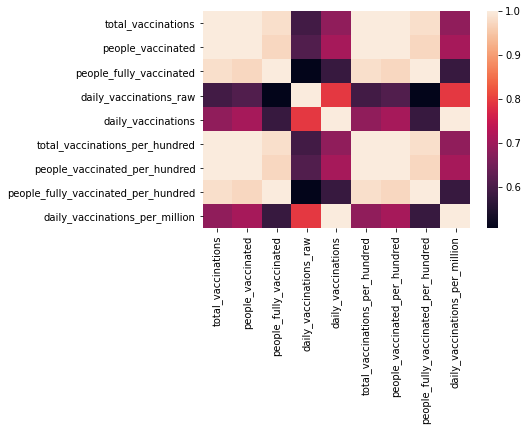

In [17]:
sb.heatmap(data.corr())

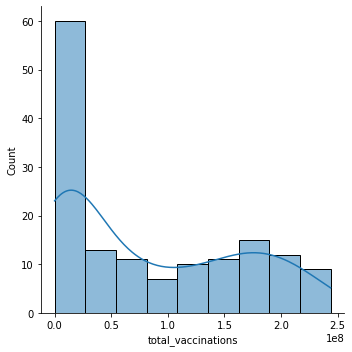

In [11]:
sb.displot(x="total_vaccinations",data=first,kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


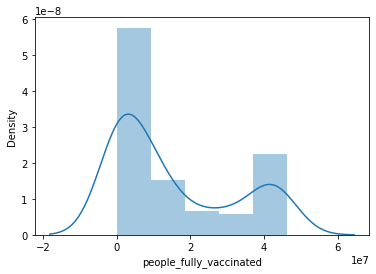

In [18]:
sb.distplot(data['people_fully_vaccinated'])


In [19]:
X=data[['total_vaccinations','people_vaccinated','total_vaccinations_per_hundred','people_vaccinated_per_hundred']]
Y=data[['people_fully_vaccinated']]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=25000)



In [27]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
linreg_pred=lr.predict(X_test)
print(linreg_pred)

linreg_accuracy=lr.score(X_test,Y_test)
print("accuracy=",lr_accuracy)

[[-4.84287739e-08]
 [ 1.48742540e+07]
 [ 4.59559070e+07]
 [ 2.45152130e+07]
 [-4.47034836e-08]
 [ 6.54246800e+06]
 [ 3.28951730e+07]
 [-3.35276127e-08]
 [-2.66591087e-08]
 [ 2.16339000e+05]
 [-3.91155481e-08]
 [ 3.97849510e+07]
 [-3.91155481e-08]
 [ 4.24195600e+07]
 [ 9.06531800e+06]
 [-3.07336450e-08]
 [ 9.60642000e+05]
 [ 7.47865400e+06]
 [ 4.12622330e+07]
 [ 7.86344100e+06]
 [ 7.66800000e+03]
 [ 5.14295300e+06]
 [ 8.87020100e+06]
 [ 4.38113420e+07]
 [ 2.59779900e+06]
 [ 2.91228330e+07]
 [ 8.82834600e+06]
 [-4.56348062e-08]
 [-3.05284902e-08]
 [ 1.38776640e+07]]
accuracy= 1.0


In [24]:
lr_accuracy

1.0